In [1]:
using  Plots, LaTeXStrings
include("Master_func.jl")

plot (generic function with 5 methods)

In [10]:
function IBP_ft(f,k,Nd)
    
    # Ultrafun f
    
    # Frequency k
    
    # Number of Chebychev polynomials N
    
    # Number of Derivatives Nd
    
    # Easily made faster.
    
    g = x-> exp.(-1im .* k .* x);
    
    res = 1im * (g(1) * f(1) - g(-1) * f(-1)) ./ k
    (g(1) * Df(1) - g(-1) * Df(-1)) |>display
    for i1 = 1:Nd
        Df = Diff(f)
        (-1im)^(i1-1) .* (g(1) * Df(1) - g(-1) * Df(-1)) ./ ((k) .^ (i1+1))|>display
        res += (-1im)^(i1-1) .* (g(1) * Df(1) - g(-1) * Df(-1)) ./ ((k) .^ (i1+1))
        f = Df
    end
    
   return res 
    
end

IBP_ft (generic function with 1 method)

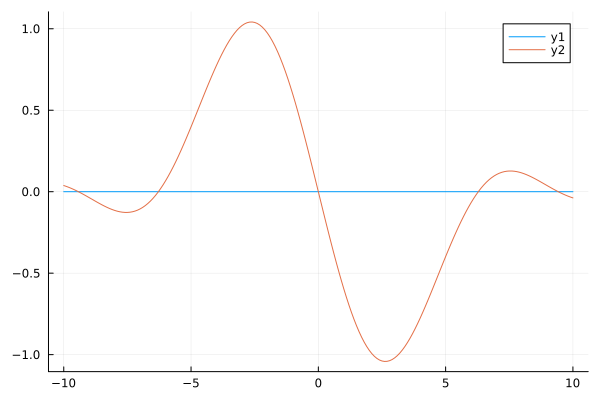

In [11]:
a = pi; f = UltraFun(0,x -> sin(a*x),100); f_ft = x -> (1im*((x-a)*sin(x+a)+(-x-a)*sin(x-a)))/(x^2-a^2)

kk = -10:0.1:10
plot(kk,real.(f_ft.(kk)))
plot!(kk,imag.(f_ft.(kk)))

In [12]:
plot(-1:.1:1,f.(-1:.1:1))
Df = Diff(f)
plot!(-1:.1:1,Df.(-1:.1:1))
Df(1)

-3.1415926535791825

In [13]:
ff_ft = k -> IBP_ft(f,k,3)
ff_ft(1)

5.802469615900918e-12 + 5.287118128154091im

5.802469615900918e-12 + 5.287118128154091im

-1.841105483585355e-8 - 1.596579481293994e-8im

-1.780711753696096e-5 + 52.181803056297625im

-1.782552279035484e-5 + 57.46892116848592im

In [ ]:
kk = -10:0.1:-1
plot(kk,real.(ff_ft.(kk)))
plot!(kk,imag.(ff_ft.(kk)))

# Ultraspherical testing


In [2]:
l = 4
f = x -> sin((l+1) * acos(x))/sin(acos(x));
#f = x -> cos(l * acos(x)) *sqrt(2)
N = 16
Ultra_spherical_coeff(f, N, 1) |> display 
dx = 0.001

x = -1+dx:dx:1-dx

λ = 1;
T = Cheb_poly(N,x,λ)

#f = x -> cos(l * acos(x));
f = x -> sin((l+1) * acos(x))/sin(acos(x));
#f = x -> cos((l+1/2) * acos(x))/cos(acos(x)/2);

plot(x,abs.(T[:,l+1] - map(f,x)))
abs.(T[:,l+1] - map(f,x))|>display

16-element Vector{Float64}:
 -1.1934897514720433e-15
  1.6930901125533637e-15
 -3.0531133177191805e-16
  1.582067810090848e-15
  1.0000000000000004
  1.0269562977782698e-15
 -1.0547118733938987e-15
  5.273559366969494e-16
 -9.367506770274758e-16
  3.2612801348363973e-16
 -5.551115123125783e-17
  2.636779683484747e-16
  3.469446951953614e-17
 -3.2612801348363973e-16
  2.914335439641036e-16
 -1.734723475976807e-16

1999-element Vector{Float64}:
 2.220446049250313e-14
 4.440892098500626e-15
 1.3322676295501878e-14
 3.552713678800501e-15
 0.0
 3.552713678800501e-15
 2.6645352591003757e-15
 8.881784197001252e-16
 0.0
 3.552713678800501e-15
 1.7763568394002505e-15
 0.0
 8.881784197001252e-16
 ⋮
 3.552713678800501e-15
 8.881784197001252e-16
 8.881784197001252e-16
 1.7763568394002505e-15
 1.7763568394002505e-15
 1.7763568394002505e-15
 3.552713678800501e-15
 3.552713678800501e-15
 8.881784197001252e-16
 2.6645352591003757e-15
 2.6645352591003757e-15
 3.552713678800501e-15

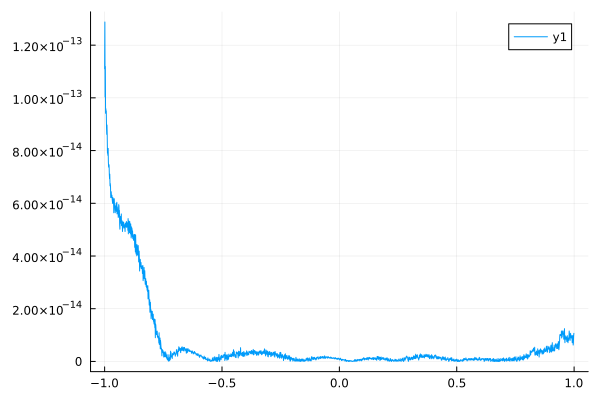

In [3]:
#f = x -> sin(2*pi*x); f_ft = x -> -(4im*pi*sin(x))/(x^2-4*pi^2);
#f = x -> cos(2*acos(x)); f_ft = x -> ((2*x^2-8)*sin(x)+8*x*cos(x))/x^3;
#f = x -> sin(2*pi*x)*cos(2*pi*x); f_ft = x -> -(4im*pi*sin(x))/(x^2-16*pi^2)
#a = 1; f = x -> sin(a*x); f_ft = x -> (1im*((x-a)*sin(x+a)+(-x-a)*sin(x-a)))/(x^2-a^2)
f = x -> sin((l+1) * acos(x))/sin(acos(x));

N = 16
λ = 0;

c = Ultra_spherical_coeff(f, N, λ)
dx = 0.001

x = -1:dx:1

T = Cheb_poly(N,x,λ)

plot(x,abs.(T * c - map(f,x)))

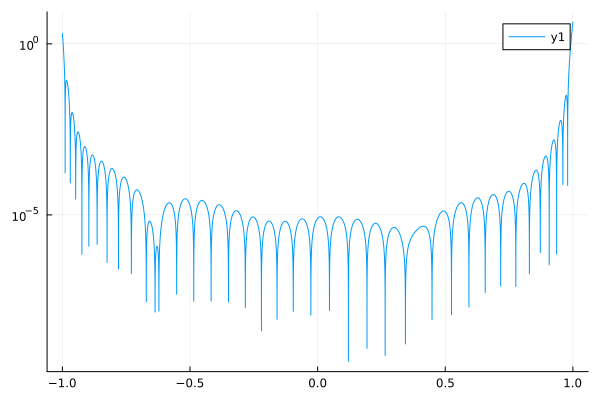

In [4]:
dx = 0.0001;
x = -1:dx:1

N = 50

k = 6

n = 4

f = x -> x^n
df = x -> factorial(n)/factorial(k)*x^(n-k)

f = x -> sin.(pi*x);
df = x -> pi^k * sin.(pi*x+k*pi/2)

c = Ultra_spherical_coeff(f, N, 0);
D = Matrix(Dk(k,N))
Pk = Cheb_poly(N,x,k)
uk = Pk*D*c;
plot(x,abs.(uk-map(df,x)),yaxis=:log)

# Fourrier

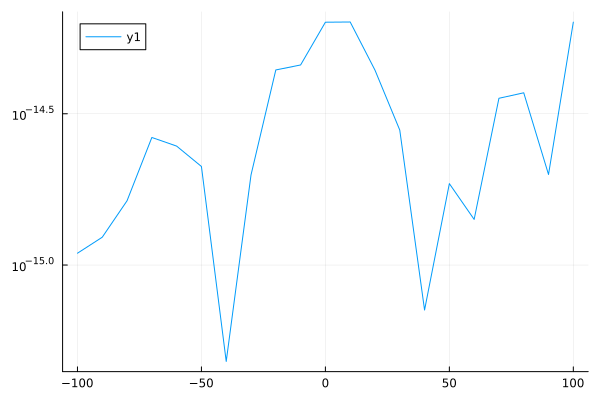

In [5]:
#f = x -> sin(2*pi*x); f_ft = x -> -(4im*pi*sin(x))/(x^2-4*pi^2);
#f = x -> cos(2*acos(x)); f_ft = x -> ((2*x^2-8)*sin(x)+8*x*cos(x))/x^3;
#f = x -> sin(2*pi*x)*cos(2*pi*x); f_ft = x -> -(4im*pi*sin(x))/(x^2-16*pi^2)
a = 1; f = x -> sin(a*x); f_ft = x -> (1im*((x-a)*sin(x+a)+(-x-a)*sin(x-a)))/(x^2-a^2)
N = 50
λ = 0;

c = Ultra_spherical_coeff(f, N, λ)

dk = 10;
k = -100:dk:100;
TT = Cheb_ft(N,k,λ);
T_ft = TT[:,1,:];
plot(k,abs.(T_ft * c - map(f_ft,k)), yaxis=:log)

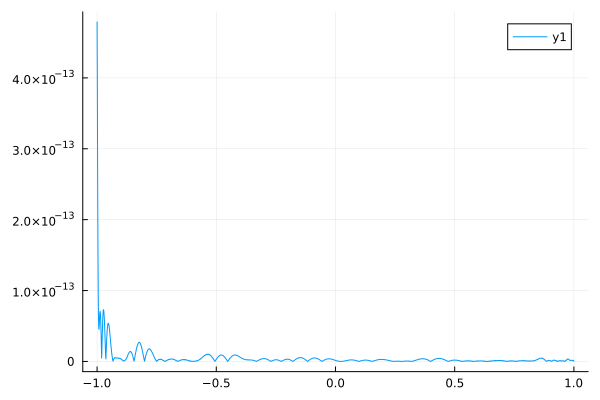

In [10]:
a = 1; f = x -> sin(a*x); f_ft = x -> (1im*((x-a)*sin(x+a)+(-x-a)*sin(x-a)))/(x^2-a^2)
N = 70
λ = 0;

c = Ultra_spherical_coeff(f, N, λ)
dx = 0.001

x = -1:dx:1

T = Cheb_poly(N,x,λ)

plot(x,abs.(T * c - map(f,x)))

In [9]:
dk = 0.1;
N = 70
k = sp(collect(-100:dk:100));
TT = Cheb_ft(N,k,λ);
T_ft = TT[:,1,:];

plot(k,abs.(T_ft * c - map(f_ft,k)), yaxis=:log)

LoadError: DimensionMismatch: matrix A has dimensions (2001,70), vector B has length 50

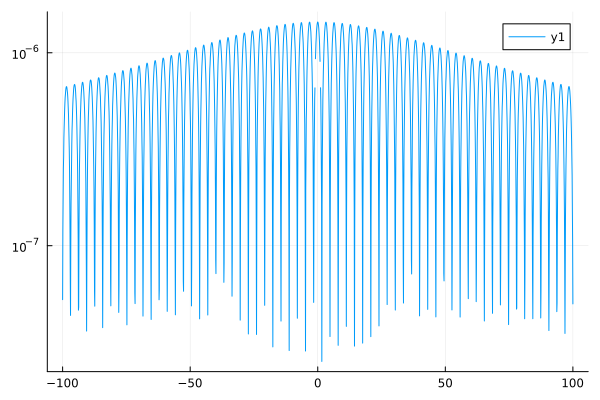

In [11]:
plot(k,abs.(T_ft * c - map(f_ft,k)), yaxis=:log)

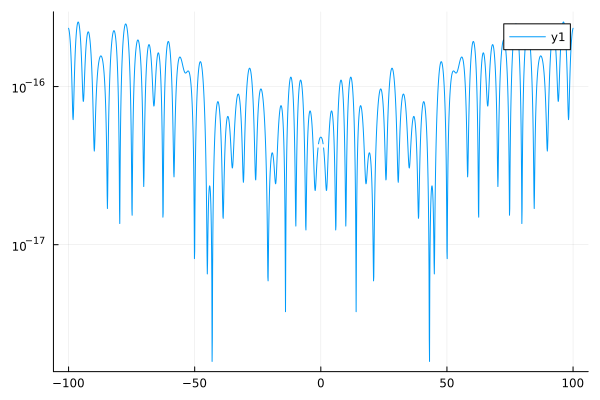

In [12]:

N = 500
s = curv(x->x ,-1,1,x->1,N)
N_ft = naive_ft(f,s,k)


plot(k,abs.(N_ft - map(f_ft,k)), yaxis=:log)

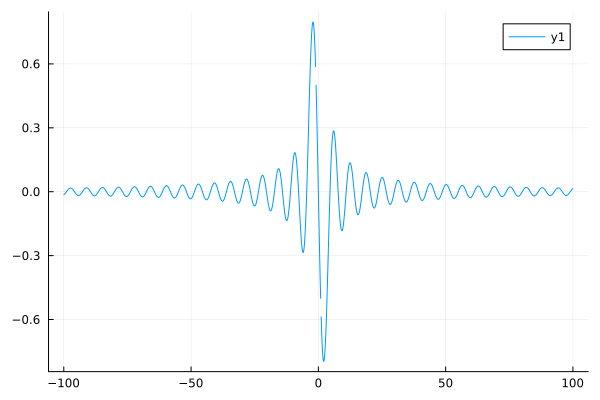

In [13]:
plot(k,imag.(map(f_ft,k)))

# Integration

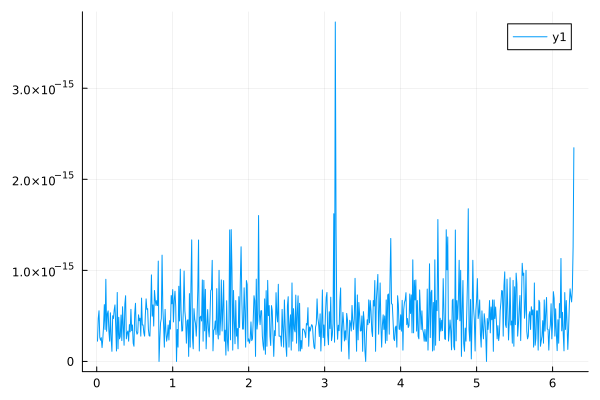

In [15]:
s = curv(x -> x,-1,1, x ->  1,4000 )
dt = .01;
t = 0:dt:2*pi;
k = exp.(1im * t)
T_ft2 = naive_ft(f,s,k)
plot(t,abs.(T_ft2 - map(f_ft,k)))

In [17]:

f = x -> exp.(2im*x)+2*exp.(3im*x); f_ft = x-> ((3*x-7)*(sin(2*pi*x)+1im*cos(2*pi*x)-1im))/(x^2-5*x+6)

k = 2im

N = 100
s = curv(x -> x,0,2*pi, x ->  1,N )
freq = naive_ft(f,s,k) 
(freq - map(f_ft,k))./map(f_ft,k)|>display
map(f_ft,k)

-1.0746569078344778e-16 + 2.268720138761675e-16im

159918.44386467195 - 204033.87665492628im

In [20]:

f = x -> exp.(2im*x)+2*exp.(3im*x); f_ft = x-> ((2*sin(x-2)+4*sin(x-3))*x-6*sin(x-2)-8*sin(x-3))/(x^2-5*x+6)

k = 2im

N = 100
s = curv(x -> x,-1,1, x ->  1,N)
ft_naive = naive_ft(f,s,k) 
(ft_naive - map(f_ft,k))|>display

N = 100

Nd = 3
s = curv(x -> x,-1,1, x ->  1,N)

ft_IBP = IBP_ft(f,k,N,Nd)
(ft_IBP - map(f_ft,k))|>display

-8.881784197001252e-16 + 1.7763568394002505e-15im

7.749129669929763 - 20.89817114093072im

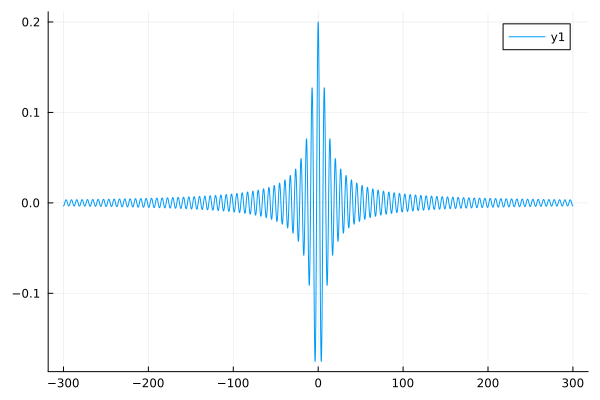

In [21]:
x = -300:0.1:300
n = 4
Sincc = Der_sinc(x,n)
plot(x,Sincc[:,n+1])

In [22]:
s = curv(x -> x,0,15, x ->  1 )

f = x -> exp.(-2*x);f_ft = x -> -(1im*x-2)/(x^2+4)


t = 1:0.01:8

k = complex(1:0.01:8) .+ 1im;
f_ft2 = naive_ft(f,s,k,40)

plot(t,abs.(f_ft2 - map(f_ft,k)),yaxis =:log)

LoadError: MethodError: no method matching curv(::var"#250#252", ::Int64, ::Int64, ::var"#251#253")

[0mClosest candidates are:
[0m  curv(::Function, ::Number, ::Number, ::Function, [91m::Number[39m)
[0m[90m   @[39m [35mMain[39m [90mc:\Users\wiets\OneDrive\Documenten\GitHub\Tom-reading-course\Code\[39m[90m[4mmyquad.jl:16[24m[39m
[0m  curv(::Function, ::Number, ::Number, ::Function, [91m::Number[39m, [91m::Number[39m, [91m::Number[39m)
[0m[90m   @[39m [35mMain[39m [90mc:\Users\wiets\OneDrive\Documenten\GitHub\Tom-reading-course\Code\[39m[90m[4mmyquad.jl:7[24m[39m
[0m  curv(::Any, ::Any, ::Any, ::Any, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m)
[0m[90m   @[39m [35mMain[39m [90mc:\Users\wiets\OneDrive\Documenten\GitHub\Tom-reading-course\Code\[39m[90m[4mmyquad.jl:7[24m[39m


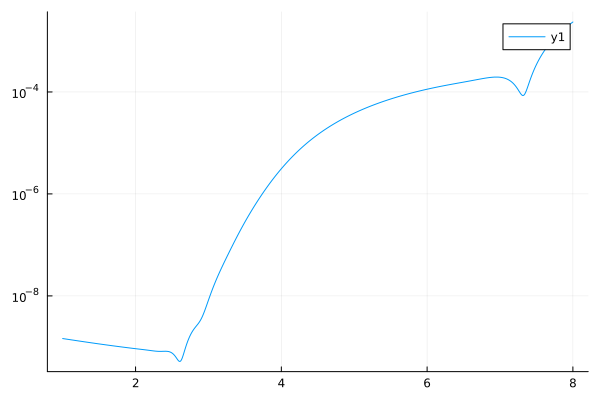

In [ ]:
s = curv(x -> x,0,20, x ->  1 )

f = x -> exp.(-2*x);f_ft = x -> -(1im*x-2)/(x^2+4)


t = 1:0.01:8

k = complex(1:0.01:8) .+ 1im;
f_ft2 = naive_ft(f,s,k,40)

plot(t,abs.(f_ft2 - map(f_ft,k)),yaxis =:log)

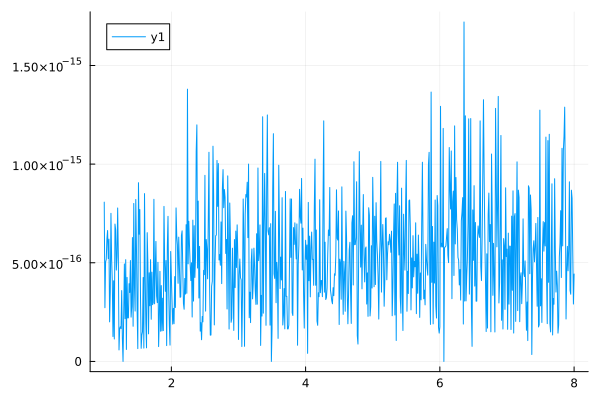

In [17]:
s = curv(x -> x,-1,1, x ->  1 )
f = x -> exp.(-2*x);f_ft = x ->(exp(-2)*(((exp(4)+1)*x+(2*exp(4)+2)*1im)*sin(x)+((1-exp(4))*1im*x+2*exp(4)-2)*cos(x)))/(x^2+4)

t = 1:0.01:8

k = complex(1:0.01:8) .+ 1im;
T_ft = naive_ft(f,s,k,40)

plot(t,abs.((T_ft - map(f_ft,k))./ map(f_ft,k)))

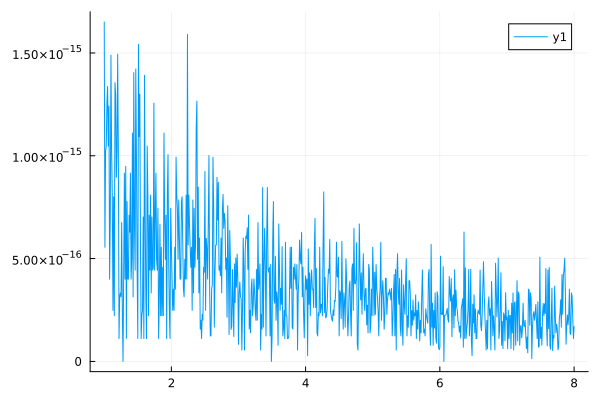

In [18]:
plot(t,abs.((T_ft - map(f_ft,k))))

In [19]:
L = 2;
Δ = k -> exp(1im*k,L)-exp(-1im*k,L)
int1 = (g,k,x,t) -> exp(1im*k*x-k^2*t)*g(k)/(2*π)
int2 = (g,k,x,t) -> exp(1im*k*x-k^2*t)* (exp(1im*k,L)*g(k)-exp(-1im*k,L)*g(-k))/(Δ(k))/(2*π)
int3 = (g,k,x,t) -> exp(-1im*k*(L-x)-k^2*t)* (g(k)-g(-k))/(Δ(k))/(2*π)

k0 = (x,t) -> 1im*x/(2*t);

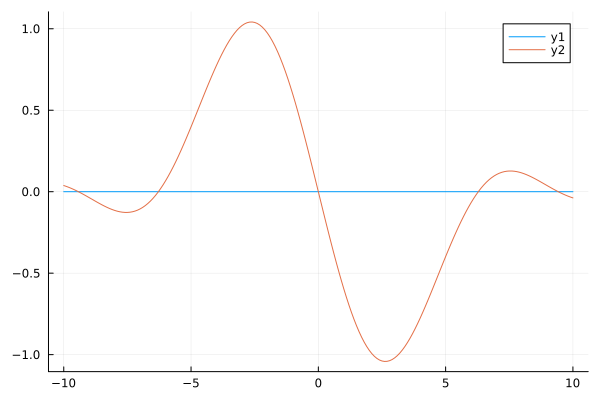

In [23]:
a = pi; f = UltraFun(0,x -> sin(a*x),100); f_ft = x -> (1im*((x-a)*sin(x+a)+(-x-a)*sin(x-a)))/(x^2-a^2)

kk = -10:0.1:10
plot(kk,real.(f_ft.(kk)))
plot!(kk,imag.(f_ft.(kk)))

In [30]:
plot(-1:.1:1,f.(-1:.1:1))
Df = Diff(f)
plot!(-1:.1:1,Df.(-1:.1:1))
Df(1)

-3.1415926535791825

In [21]:
ff_ft = k -> IBP_ft(f,k,3)
ff_ft(1)

-0.0033539515785372745 + 57.46770321540154im

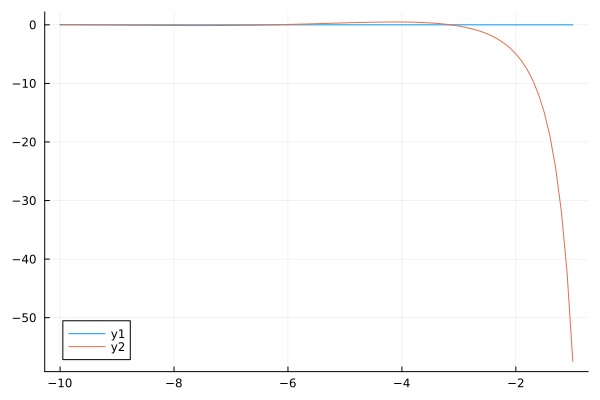

In [17]:
kk = -10:0.1:-1
plot(kk,real.(ff_ft.(kk)))
plot!(kk,imag.(ff_ft.(kk)))